 # <div style="text-align: center">Statistical Analysis for PetFinder  </div> 
### <div style="text-align: center">Quite Practical and Far from any Theoretical Concepts </div> 

<img src='http://s9.picofile.com/file/8348667418/kp.png' width=400 height=400>

<div style="text-align:center">last update: <b>11/01/2019</b></div>



You can Fork code  and  Follow me on:

> ###### [ GitHub](https://github.com/mjbahmani/10-steps-to-become-a-data-scientist)
> ###### [Kaggle](https://www.kaggle.com/mjbahmani/)
-------------------------------------------------------------------------------------------------------------
 <b>I hope you find this kernel helpful and some <font color='red'>UPVOTES</font> would be very much appreciated.</b>
    
 -----------

 <a id="top"></a> <br>
## Notebook  Content
1. [Introduction](#1)
1. [Python Packages](#2)
1. [Problem Definition](#3)
1. [Exploratory Data Analysis(EDA)](#4)
1. [References](#5)

 <a id="1"></a> <br>
## 1- Introduction
Millions of stray animals suffer on the streets or are euthanized in shelters every day around the world. If homes can be found for them, many precious lives can be saved — and more happy families created.

PetFinder.my has been Malaysia’s leading animal welfare platform since 2008, with a database of more than 150,000 animals. PetFinder collaborates closely with animal lovers, media, corporations, and global organizations to improve animal welfare.
<img src='https://d17fnq9dkz9hgj.cloudfront.net/uploads/2017/10/PF2015_267_Kittens_Shelter-630.jpg'>

In this competition we will be developing algorithms to predict the adoptability of pets - specifically, how quickly is a pet adopted? If successful, they will be adapted into AI tools that will guide shelters and rescuers around the world on improving their pet profiles' appeal, reducing animal suffering and euthanization.

 <a id="2"></a> <br>
 ## 2- Python Packages
  <a id="2"></a> <br>
## 2-1 Import

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.patches as patch
import matplotlib.pyplot as plt
from sklearn.svm import NuSVR
from scipy.stats import norm
from scipy import linalg
from sklearn import svm
import tensorflow as tf
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import glob
import sys
import os

 <a id="22"></a> <br>
##  2-2 Setup

In [15]:
%matplotlib inline
%precision 4
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 15)

 <a id="23"></a> <br>
## 2-3 Version


In [16]:
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

pandas: 0.23.4
numpy: 1.15.4
Python: 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]


<a id="3"></a> 
<br>
## 3- Problem Definition
I think one of the important things when you start a new machine learning project is Defining your problem. that means you should understand business problem.( **Problem Formalization**)

Problem Definition has four steps that have illustrated in the picture below:
<img src="http://s8.picofile.com/file/8338227734/ProblemDefination.png">

* developing algorithms to predict the adoptability of pets


 <a id="31"></a> <br>
### 3-1 Problem Feature


1.     train.csv - Tabular/text data for the training set
1.     test.csv - Tabular/text data for the test set
1.     sample_submission.csv - A sample submission file in the correct format
1.     breed_labels.csv - Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.
1.     color_labels.csv - Contains ColorName for each ColorID
1.     state_labels.csv - Contains StateName for each StateID



 <a id="32"></a> <br>
### 3-2 Aim
**developing algorithms to predict the adoptability of pets**

 <a id="33"></a> <br>
### 3-3 Variables

1.     acoustic_data - the seismic signal [int16]
1.     time_to_failure - the time (in seconds) until the next laboratory earthquake [float64]
1.     seg_id - the test segment ids for which predictions should be made (one prediction per segment)


 <a id="34"></a> <br>
## 3-4 evaluation
Results have 5 possible ratings, 0,1,2,3,4.  The quadratic weighted kappa is calculated as follows. First, an N x N histogram matrix O is constructed, such that Oi,j corresponds to the number of adoption records that have a rating of i (actual) and received a predicted rating j. An N-by-N matrix of weights, w, is calculated based on the difference between actual and predicted rating scores:



 <a id="4"></a> <br>
## 4- Exploratory Data Analysis(EDA)
 In this section, we'll analysis how to use graphical and numerical techniques to begin uncovering the structure of your data. 
 
* Which variables suggest interesting relationships?
* Which observations are unusual?
* Analysis of the features!
By the end of the section, you'll be able to answer these questions and more, while generating graphics that are both insightful and beautiful.  then We will review analytical and statistical operations:

*  Data Collection
*  Visualization
*  Data Preprocessing
*  Data Cleaning

 <a id="41"></a> <br>
## 4-1 Data Collection

In [17]:
print(os.listdir("../input"))

['train', 'test', 'breed_labels.csv', 'train_sentiment', 'test_sentiment', 'test_metadata', 'train_images', 'train_metadata', 'state_labels.csv', 'color_labels.csv', 'test_images']


In [18]:
# import Dataset to play with it
train = pd.read_csv("../input/train/train.csv")
test = pd.read_csv("../input/test/test.csv")

In [19]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [20]:
train.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000
mean,1.457613552991396,10.452077636230241,265.272593877142640,74.009737877676244,1.776162209030881,2.234175948776095,3.222837324084573,1.882011605415861,1.862002267724938,1.467484826252251,1.731207897018609,1.558727406122857,1.914226639098246,1.036617087974388,1.576068832121657,21.259987994397385,41346.028346561732178,0.056759821249917,3.889214966984593,2.516441005802708
std,0.498216764904840,18.155790407073994,60.056818364099179,123.011574891335641,0.681592102647082,1.745225386342954,2.742561742356041,2.984085752478590,0.547958925698933,0.599069830659327,0.667649302639065,0.695816729044446,0.566171932846075,0.199535416031035,1.472477255310417,78.414547671149435,32.444152978324531,0.346184550209785,3.487810245437061,1.177264765199060
min,1.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000,1.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,0.000000000000000,41324.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,1.000000000000000,2.000000000000000,265.000000000000000,0.000000000000000,1.000000000000000,1.000000000000000,0.000000000000000,0.000000000000000,2.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,2.000000000000000,1.000000000000000,1.000000000000000,0.000000000000000,41326.000000000000000,0.000000000000000,2.000000000000000,2.000000000000000
50%,1.000000000000000,3.000000000000000,266.000000000000000,0.000000000000000,2.000000000000000,2.000000000000000,2.000000000000000,0.000000000000000,2.000000000000000,1.000000000000000,2.000000000000000,1.000000000000000,2.000000000000000,1.000000000000000,1.000000000000000,0.000000000000000,41326.000000000000000,0.000000000000000,3.000000000000000,2.000000000000000
75%,2.000000000000000,12.000000000000000,307.000000000000000,179.000000000000000,2.000000000000000,3.000000000000000,6.000000000000000,5.000000000000000,2.000000000000000,2.000000000000000,2.000000000000000,2.000000000000000,2.000000000000000,1.000000000000000,1.000000000000000,0.000000000000000,41401.000000000000000,0.000000000000000,5.000000000000000,4.000000000000000
max,2.000000000000000,255.000000000000000,307.000000000000000,307.000000000000000,3.000000000000000,7.000000000000000,7.000000000000000,7.000000000000000,4.000000000000000,3.000000000000000,3.000000000000000,3.000000000000000,3.000000000000000,3.000000000000000,20.000000000000000,3000.000000000000000,41415.000000000000000,8.000000000000000,30.000000000000000,4.000000000000000


In [21]:
train.shape

(14993, 24)

In [22]:
train.isna().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

In [23]:
type(train)

pandas.core.frame.DataFrame

 <a id="42"></a> <br>
## 4-2 Visualization

 <a id="421"></a> <br>
### 4-2-1 hist

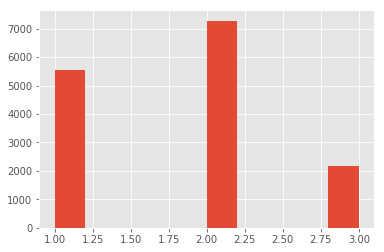

In [24]:
#Hist for Gender
train["Gender"].hist();

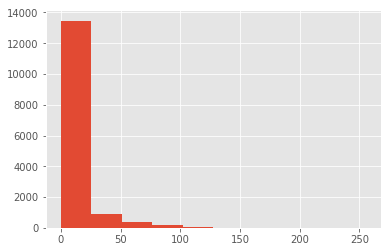

In [25]:
#Age in months
train["Age"].hist();

 <a id="422"></a> <br>
### 4-2-2 scatter_matrix

pd.plotting.scatter_matrix(train,figsize=(10,10))
plt.figure()

 <a id="423"></a> <br>
### 4-2-3 jointplot

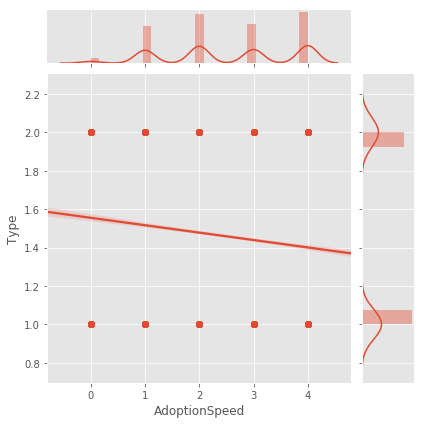

In [26]:
sns.jointplot(x='AdoptionSpeed',y='Type' ,data=train, kind='reg')

 <a id="424"></a> <br>
### 4-2-4 Time to failure histogram

Text(0.5,1,'AdoptionSpeed histogram')

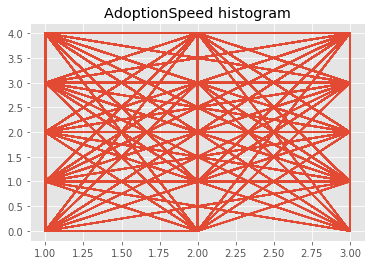

In [27]:
plt.plot(train["Gender"], train["AdoptionSpeed"])
plt.title("AdoptionSpeed histogram")

 <a id="425"></a> <br>
### 4-2-5 Distplot

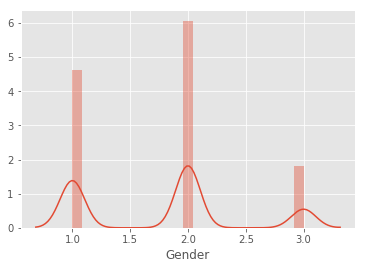

In [28]:
sns.distplot(train["Gender"])

### 4-2-6 kdeplot

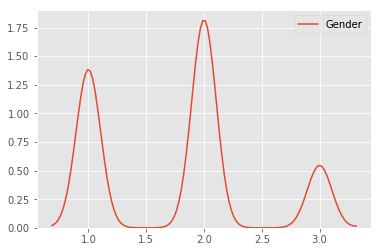

In [29]:
sns.kdeplot(train["Gender"] )

 <a id="43"></a> <br>
## 4-3 Data Preprocessing


In [30]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [31]:
train.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000,14993.000000000000000
mean,1.457613552991396,10.452077636230241,265.272593877142640,74.009737877676244,1.776162209030881,2.234175948776095,3.222837324084573,1.882011605415861,1.862002267724938,1.467484826252251,1.731207897018609,1.558727406122857,1.914226639098246,1.036617087974388,1.576068832121657,21.259987994397385,41346.028346561732178,0.056759821249917,3.889214966984593,2.516441005802708
std,0.498216764904840,18.155790407073994,60.056818364099179,123.011574891335641,0.681592102647082,1.745225386342954,2.742561742356041,2.984085752478590,0.547958925698933,0.599069830659327,0.667649302639065,0.695816729044446,0.566171932846075,0.199535416031035,1.472477255310417,78.414547671149435,32.444152978324531,0.346184550209785,3.487810245437061,1.177264765199060
min,1.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000,1.000000000000000,0.000000000000000,0.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,0.000000000000000,41324.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,1.000000000000000,2.000000000000000,265.000000000000000,0.000000000000000,1.000000000000000,1.000000000000000,0.000000000000000,0.000000000000000,2.000000000000000,1.000000000000000,1.000000000000000,1.000000000000000,2.000000000000000,1.000000000000000,1.000000000000000,0.000000000000000,41326.000000000000000,0.000000000000000,2.000000000000000,2.000000000000000
50%,1.000000000000000,3.000000000000000,266.000000000000000,0.000000000000000,2.000000000000000,2.000000000000000,2.000000000000000,0.000000000000000,2.000000000000000,1.000000000000000,2.000000000000000,1.000000000000000,2.000000000000000,1.000000000000000,1.000000000000000,0.000000000000000,41326.000000000000000,0.000000000000000,3.000000000000000,2.000000000000000
75%,2.000000000000000,12.000000000000000,307.000000000000000,179.000000000000000,2.000000000000000,3.000000000000000,6.000000000000000,5.000000000000000,2.000000000000000,2.000000000000000,2.000000000000000,2.000000000000000,2.000000000000000,1.000000000000000,1.000000000000000,0.000000000000000,41401.000000000000000,0.000000000000000,5.000000000000000,4.000000000000000
max,2.000000000000000,255.000000000000000,307.000000000000000,307.000000000000000,3.000000000000000,7.000000000000000,7.000000000000000,7.000000000000000,4.000000000000000,3.000000000000000,3.000000000000000,3.000000000000000,3.000000000000000,3.000000000000000,20.000000000000000,3000.000000000000000,41415.000000000000000,8.000000000000000,30.000000000000000,4.000000000000000


In [32]:
train.Gender.describe()

count    14993.000000000000000
mean         1.776162209030881
std          0.681592102647082
min          1.000000000000000
25%          1.000000000000000
50%          2.000000000000000
75%          2.000000000000000
max          3.000000000000000
Name: Gender, dtype: float64

In [33]:
train.shape

(14993, 24)

In [34]:
train.isna().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

you can follow me on:
> ###### [ GitHub](https://github.com/mjbahmani/)
> ###### [Kaggle](https://www.kaggle.com/mjbahmani/)

 <b>I hope you find this kernel helpful and some <font color='red'>UPVOTES</font> would be very much appreciated.<b/>
 

<a id="5"></a> <br>
# 5-References
1. [Basic Probability Data Science with examples](https://www.analyticsvidhya.com/blog/2017/02/basic-probability-data-science-with-examples/)
1. [How to self learn statistics of data science](https://medium.com/ml-research-lab/how-to-self-learn-statistics-of-data-science-c05db1f7cfc3)
1. [Probability statistics for data science- series](https://towardsdatascience.com/probability-statistics-for-data-science-series-83b94353ca48)
1. [basic-statistics-in-python-probability](https://www.dataquest.io/blog/basic-statistics-in-python-probability/)
1. [tutorialspoint](https://www.tutorialspoint.com/python/python_poisson_distribution.htm)

Go to first step: [Course Home Page](https://www.kaggle.com/mjbahmani/10-steps-to-become-a-data-scientist)

Go to next step : [Titanic](https://www.kaggle.com/mjbahmani/a-comprehensive-ml-workflow-with-python)


# Not Completed yet!!!